<a href="https://colab.research.google.com/github/rsaeed15/rsaeed15/blob/main/fsi_nn_feature_importance_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Rifat Saeed
# Impact of State Fragility on Sovereign Credit Default Swap

In [2]:
#load libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
#import lifelines
# import shap

In [3]:
# This sets a common size for all the figures we will draw.
plt.rcParams['figure.figsize'] = [10, 7]

In [4]:
# Uploading spam csv file
from google.colab import files
uploaded = files.upload()

Saving cds_file_updated.csv to cds_file_updated.csv


In [5]:
# Building a spam mail classifier in Python
import pandas as pd
import io
df = pd.read_csv(r'cds_file_updated.csv',encoding='ISO-8859-1')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dp      660 non-null    int64  
 1   ref     660 non-null    int64  
 2   gg      660 non-null    int64  
 3   hf      660 non-null    int64  
 4   ud      660 non-null    int64  
 5   ped     660 non-null    int64  
 6   ls      660 non-null    int64  
 7   ps      660 non-null    int64  
 8   hr      660 non-null    int64  
 9   sa      660 non-null    int64  
 10  fe      660 non-null    int64  
 11  ei      660 non-null    int64  
 12  lfsi    660 non-null    float64
dtypes: float64(1), int64(12)
memory usage: 67.2 KB


In [7]:
X=df[['dp','ref','gg','hf','ud','ped','ls','ps','hr','sa','fe','ei']].values
y = df['lfsi'].values

In [8]:
#split the data 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) 

In [15]:
from keras import regularizers
model = Sequential()
model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(6, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history=model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=1, validation_split=0.1)

Epoch 1/500
6/6 [==============================] - 1s 33ms/step - loss: 0.0144 - mse: 0.0135 - val_loss: 0.0117 - val_mse: 0.0108
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0121 - mse: 0.0111 - val_loss: 0.0110 - val_mse: 0.0101
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0108 - mse: 0.0099 - val_loss: 0.0104 - val_mse: 0.0095
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0100 - mse: 0.0091 - val_loss: 0.0106 - val_mse: 0.0097
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 0.0097 - mse: 0.0088 - val_loss: 0.0101 - val_mse: 0.0092
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0094 - mse: 0.0085 - val_loss: 0.0109 - val_mse: 0.0100
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 0.0100 - mse: 0.0091 - val_loss: 0.0099 - val_mse: 0.0090
Epoch 8/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0095 - mse: 0.0086 - va

In [18]:
y_pred=model.predict(X_train[[1,]])
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.0030 - mse: 0.0022


[0.0029771120753139257, 0.0021941668819636106]

In [19]:
y_pred

array([[4.4939237]], dtype=float32)

In [20]:
y_train[[1,]]

array([4.48863637])

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


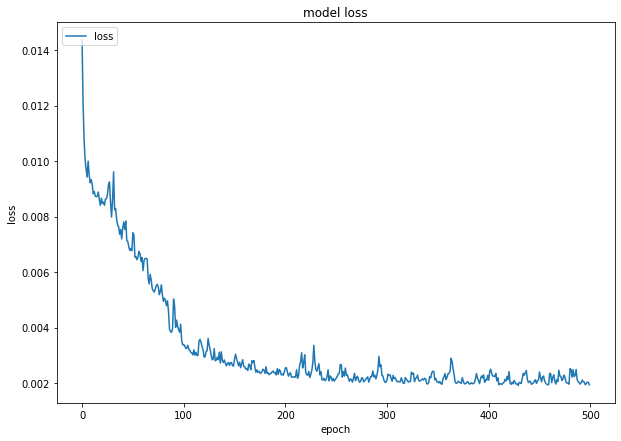

In [21]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()